In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Example 2

In [2]:
df = pd.read_csv('dataset/ex2data2.txt', header=None, names=['score1', 'score2', 'y'])

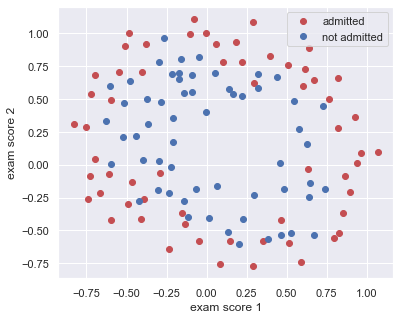

In [3]:
fig, ax = plt.subplots(figsize=(6,5))
plt.plot(df[df['y']==0]['score1'], df[df['y']==0]['score2'], 'or')
plt.plot(df[df['y']==1]['score1'], df[df['y']==1]['score2'], 'ob')
plt.xlabel('exam score 1')
plt.ylabel('exam score 2')
plt.legend(['admitted', 'not admitted'])
plt.show()

## Feautre mapping 

We will use a 28-dimensional vector that is transformed from two features ($x_1$=exam score 1, $x_2$= exam score 2). The transformed new vector is represented as below. 

$$
X = \text{mapFeature}(x) = 
\begin{equation*}
\begin{bmatrix}
1 \\
x_1 \\
x_2 \\
x_1^2 \\
x_1x_2 \\
x_2^2 \\
x_1^3 \\
\vdots \\
x_1x_2^5 \\ 
x_2^6 
\end{bmatrix}
\end{equation*}
$$

This will give us a flexibility of the hypothesis.

In [4]:
def map_feature(x1, x2, degree):
    num_data = len(x1)

    count = 1
    output = np.ones((num_data, 1))
    for d in range(1, degree+1): 
        for i in range(d+1):
            val = x1**i * x2**(d-i)
            output = np.hstack((output, val.reshape(num_data, 1)))
            count+= 1
    return output 

In [5]:
x1 = df['score1'].to_numpy()
x2 = df['score2'].to_numpy()
y = df['y'].to_numpy().reshape(-1, 1)

In [6]:
X = map_feature(x1, x2, degree=6)

In [7]:
X

array([[ 1.00000000e+00,  6.99560000e-01,  5.12670000e-02, ...,
         3.38066048e-06,  2.47750473e-07,  1.81563032e-08],
       [ 1.00000000e+00,  6.84940000e-01, -9.27420000e-02, ...,
         3.47065055e-05, -4.69931780e-06,  6.36295342e-07],
       [ 1.00000000e+00,  6.92250000e-01, -2.13710000e-01, ...,
         9.99597833e-04, -3.08593793e-04,  9.52684426e-05],
       ...,
       [ 1.00000000e+00,  9.99270000e-01, -4.84450000e-01, ...,
         5.49998544e-02, -2.66641443e-02,  1.29268813e-02],
       [ 1.00000000e+00,  9.99270000e-01, -6.33640000e-03, ...,
         1.60966700e-09, -1.02069450e-11,  6.47225339e-14],
       [ 1.00000000e+00, -3.06120000e-02,  6.32650000e-01, ...,
         1.50119621e-04, -3.10248197e-03,  6.41181634e-02]])

## Gradient descent with regularization


The cost function of logistic regression is: 
$$ J(\theta) = \frac{1}{m}\sum_{i=0}^{i=m}[-y^{(i)} \log(h_\theta(x^{(i)})) - (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))] + 
\frac{\lambda}{2m}\sum_{j=0}^{j=n}\theta_j^2$$

Also, gradient of the cost function is: 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=0}^{i=m}{(h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}} \ \ \text{for} \ \ j=0  $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=0}^{i=m}{(h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}} + \frac{\lambda}{m}\theta_j \ \ \text{for} \ \ j \ge 1 $$ 

When updating theta,
$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$


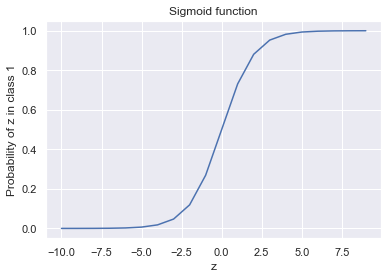

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

xx = np.arange(-10, 10)
yy = sigmoid(xx)
plt.plot(xx, yy)
plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("Probability of z in class 1")
plt.show()

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def compute_hypothesis(theta, X):
    return sigmoid(X.dot(theta))

def compute_gradient(X, y, h, theta, Lambda):
    gradient = np.zeros(theta.shape)
    n = len(y)
    
    for j in range(len(theta)): 
        gradient[j] = sum(np.multiply(h-y, X[:, j:j+1]))/n
        if j > 0:
            gradient[j] += Lambda/n*theta[j]
    return gradient 

def cost_function(theta, X, y, Lambda):
    h = compute_hypothesis(theta, X)
    n = len(y)
    error = -np.multiply(y, np.log(h)) - np.multiply(1-y, np.log(1-h))
    cost = sum(error)/n
    cost_reg = cost + Lambda/(2*n) * sum(theta**2) 
    gradient = compute_gradient(X, y, h, theta, Lambda)
    return cost_reg, gradient
    
def gradient_descent(X, y, theta, learning_rate, n_iter, epsilon, Lambda):
    costs = []
    for i in range(n_iter):
        cost, gradient = cost_function(theta, X, y, Lambda)
        costs.append(cost)
        if cost < epsilon: 
            return theta, costs
        
        # update theta 
        theta = theta - learning_rate * gradient
    return theta, costs
    

In [10]:
# initialize theta 
rows, cols = X.shape
initial_theta = np.zeros((cols, 1))

theta, cost = gradient_descent(X, y, initial_theta, learning_rate=0.9, n_iter=1000, epsilon=0.0001, Lambda=0)

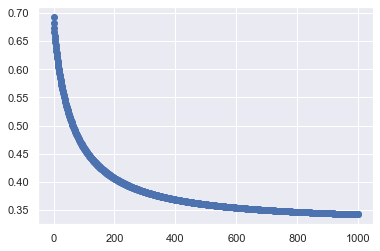

In [11]:
plt.plot(np.arange(len(cost)), cost, 'o-')

## Calculate accuracy on training data

In [12]:
def predict(theta, X, y): 
    h = compute_hypothesis(theta, X)
    y_hat = (h >= 0.5)*1
    accuracy = np.mean((y_hat - y) == 0)
    return accuracy

In [13]:
predict(theta, X, y)

0.8389830508474576

## Visualize

In [14]:
def get_contour(theta, degree):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))

    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(map_feature(u[i:i+1], v[j:j+1], degree), theta)
    return u, v, z

def visualize_contour(df, u, v, z, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    plt.plot(df[df['y']==0]['score1'], df[df['y']==0]['score2'], 'or')
    plt.plot(df[df['y']==1]['score1'], df[df['y']==1]['score2'], 'ob')
    plt.contour(u, v, z, 0)
    plt.title(title)
    plt.xlabel('exam score 1')
    plt.ylabel('exam score 2')
    plt.legend(['admitted', 'not admitted'])
    plt.show()

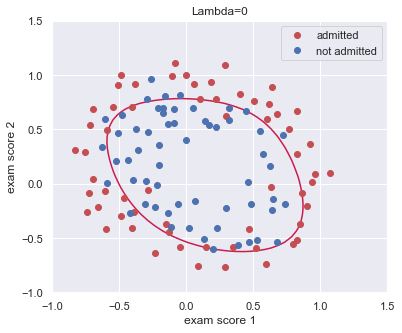

In [15]:
u,v, z = get_contour(theta, degree=6)
visualize_contour(df, u, v, z, title='Lambda=0')

## Compare different regularization parameters 

### lambda = 1

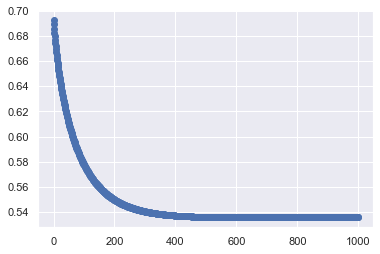

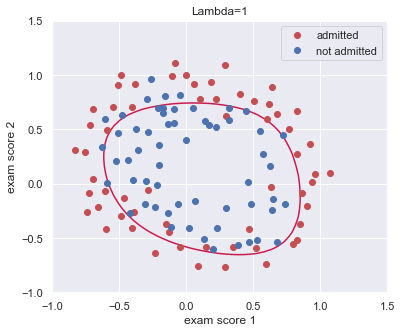

Accuracy on training data: 0.8305084745762712


In [16]:
theta1, cost1 = gradient_descent(X, y, initial_theta, learning_rate=0.3, n_iter=1000, epsilon=0.0001, Lambda=1)
plt.plot(np.arange(len(cost1)), cost1, 'o-')
u,v, z = get_contour(theta1, degree=6)
visualize_contour(df, u, v, z, title='Lambda=1')
accuracy1 = predict(theta1, X, y)
print(f"Accuracy on training data: {accuracy1}")

### lambda = 10

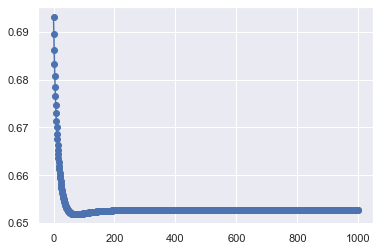

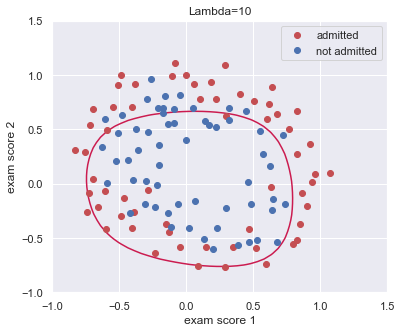

Accuracy on training data: 0.7457627118644068


In [17]:
theta1, cost1 = gradient_descent(X, y, initial_theta, learning_rate=0.3, n_iter=1000, epsilon=0.0001, Lambda=10)
plt.plot(np.arange(len(cost1)), cost1, 'o-')
u,v, z = get_contour(theta1, degree=6)
visualize_contour(df, u, v, z, title='Lambda=10')
accuracy1 = predict(theta1, X, y)
print(f"Accuracy on training data: {accuracy1}")